In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rules = pd.read_csv("all-rules-with-metrics.csv").sort_values(by=["fromLib", "ruleFreq"], ascending=[True, False])

rules = rules[rules["fromLib"] != rules["toLib"]]
rules["relativeRuleFrequency"] = 0
rules["popularityRegularization"] = 0
rules["distance"] = rules["distance"].apply(lambda x: [int(y) for y in x.split(";")])
rules["distanceAdjustment"] = rules["distance"].apply(lambda x: np.mean([((5 + 1) / (y + 1)) ** 1 for y in x]))
for from_lib, rows in rules.groupby(by="fromLib"):
    relativeRuleFreq = rows["ruleFreq"] / max(rows["ruleFreq"])
    apiSupport = rows["apiCounter"] / max(rows["apiCounter"])
    concurrenceAdjustment = rows["ruleFreq"] / (rows["concurrence"] + 1)
    popularityRegularization = relativeRuleFreq * concurrenceAdjustment
    rules["relativeRuleFrequency"].update(relativeRuleFreq)
    rules["popularityRegularization"].update(popularityRegularization)
    rules["apiSupport"].update(apiSupport)
    
possible_rules = rules[rules["isPossible"]]
confirmed_rules = rules[rules["dataConfirmed"]]
other_rules = rules[(~rules["isPossible"]) & (~rules["dataConfirmed"])]
print("# possible rules = {}, # confirmed rules = {}, # other rules = {}".format(
      len(possible_rules), 
      len(confirmed_rules), 
      len(other_rules)
))

# possible rules = 1588, # confirmed rules = 289, # other rules = 754234


In [3]:
rules.to_csv("all-rules-with-metrics.csv")

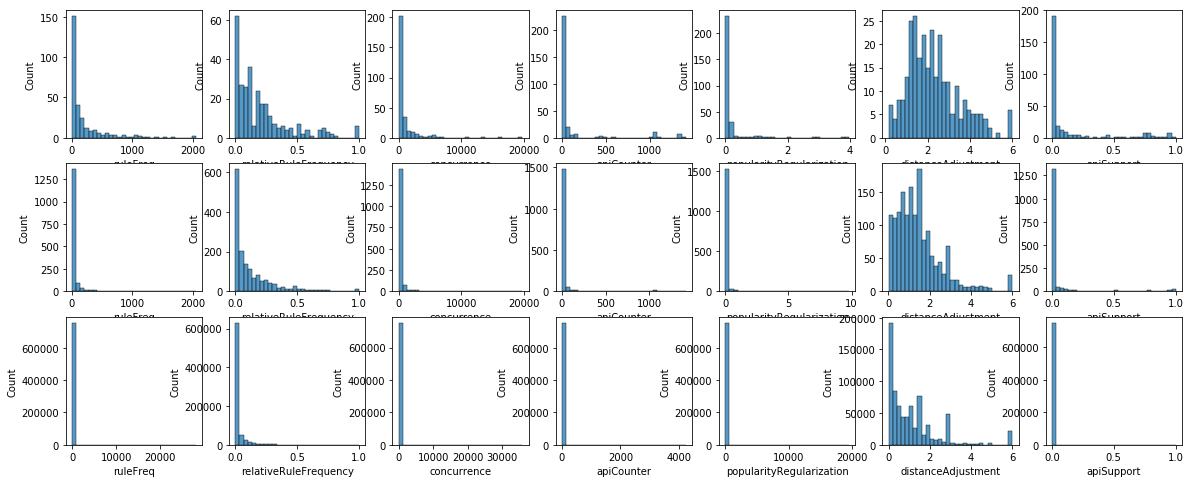

In [4]:
fig, axes = plt.subplots(3, 7, figsize=(20, 8))
data = [rules[rules["dataConfirmed"]], rules[rules["isPossible"]], rules[(~rules["isPossible"]) & (~rules["dataConfirmed"])]]
axis = ["ruleFreq", "relativeRuleFrequency", "concurrence", "apiCounter", "popularityRegularization", "distanceAdjustment", "apiSupport"]
for i in range(0, 3):
    for j in range(0, 7):
        sns.histplot(data=data[i], x=axis[j], ax=axes[i][j], bins=30)
plt.show()

In [5]:
def show_dist(metric, min_val, max_val, interval):
    for i in np.arange(min_val, max_val, interval):
        print("{} > {:.2f}: # possible = {}({:.2%}), # confirmed = {}({:.2%}), # other = {}({:.2%})".format(
            metric, i,
            len(possible_rules[possible_rules[metric] >= i]),
            len(possible_rules[possible_rules[metric] >= i]) / len(possible_rules),
            len(confirmed_rules[confirmed_rules[metric] >= i]),
            len(confirmed_rules[confirmed_rules[metric] >= i]) / len(confirmed_rules),
            len(other_rules[other_rules[metric] >= i]),
            len(other_rules[other_rules[metric] >= i]) / len(other_rules),
        ))
show_dist("ruleFreq", 0, 20, 1)

ruleFreq > 0.00: # possible = 1588(100.00%), # confirmed = 289(100.00%), # other = 754234(100.00%)
ruleFreq > 1.00: # possible = 1588(100.00%), # confirmed = 289(100.00%), # other = 754234(100.00%)
ruleFreq > 2.00: # possible = 1310(82.49%), # confirmed = 288(99.65%), # other = 447601(59.35%)
ruleFreq > 3.00: # possible = 1177(74.12%), # confirmed = 284(98.27%), # other = 315100(41.78%)
ruleFreq > 4.00: # possible = 1069(67.32%), # confirmed = 282(97.58%), # other = 243300(32.26%)
ruleFreq > 5.00: # possible = 990(62.34%), # confirmed = 276(95.50%), # other = 194224(25.75%)
ruleFreq > 6.00: # possible = 931(58.63%), # confirmed = 274(94.81%), # other = 168797(22.38%)
ruleFreq > 7.00: # possible = 871(54.85%), # confirmed = 270(93.43%), # other = 140090(18.57%)
ruleFreq > 8.00: # possible = 825(51.95%), # confirmed = 266(92.04%), # other = 126297(16.75%)
ruleFreq > 9.00: # possible = 782(49.24%), # confirmed = 260(89.97%), # other = 111643(14.80%)
ruleFreq > 10.00: # possible = 749(47.1

In [6]:
show_dist("relativeRuleFrequency", 0, 1.0, 0.05)

relativeRuleFrequency > 0.00: # possible = 1588(100.00%), # confirmed = 289(100.00%), # other = 754234(100.00%)
relativeRuleFrequency > 0.05: # possible = 863(54.35%), # confirmed = 211(73.01%), # other = 96226(12.76%)
relativeRuleFrequency > 0.10: # possible = 651(40.99%), # confirmed = 175(60.55%), # other = 52257(6.93%)
relativeRuleFrequency > 0.15: # possible = 484(30.48%), # confirmed = 136(47.06%), # other = 32167(4.26%)
relativeRuleFrequency > 0.20: # possible = 391(24.62%), # confirmed = 108(37.37%), # other = 23636(3.13%)
relativeRuleFrequency > 0.25: # possible = 296(18.64%), # confirmed = 82(28.37%), # other = 17693(2.35%)
relativeRuleFrequency > 0.30: # possible = 222(13.98%), # confirmed = 63(21.80%), # other = 12940(1.72%)
relativeRuleFrequency > 0.35: # possible = 177(11.15%), # confirmed = 54(18.69%), # other = 10095(1.34%)
relativeRuleFrequency > 0.40: # possible = 151(9.51%), # confirmed = 45(15.57%), # other = 8122(1.08%)
relativeRuleFrequency > 0.45: # possible = 12

In [7]:
show_dist("concurrence", 0, 20, 1)

concurrence > 0.00: # possible = 1588(100.00%), # confirmed = 289(100.00%), # other = 754234(100.00%)
concurrence > 1.00: # possible = 1502(94.58%), # confirmed = 288(99.65%), # other = 525592(69.69%)
concurrence > 2.00: # possible = 1502(94.58%), # confirmed = 288(99.65%), # other = 525592(69.69%)
concurrence > 3.00: # possible = 1400(88.16%), # confirmed = 281(97.23%), # other = 396030(52.51%)
concurrence > 4.00: # possible = 1400(88.16%), # confirmed = 281(97.23%), # other = 396030(52.51%)
concurrence > 5.00: # possible = 1331(83.82%), # confirmed = 274(94.81%), # other = 308367(40.88%)
concurrence > 6.00: # possible = 1331(83.82%), # confirmed = 274(94.81%), # other = 308367(40.88%)
concurrence > 7.00: # possible = 1265(79.66%), # confirmed = 272(94.12%), # other = 254757(33.78%)
concurrence > 8.00: # possible = 1265(79.66%), # confirmed = 272(94.12%), # other = 254757(33.78%)
concurrence > 9.00: # possible = 1212(76.32%), # confirmed = 271(93.77%), # other = 219815(29.14%)
concurr

In [8]:
show_dist("apiCounter", 0, 20, 1)

apiCounter > 0.00: # possible = 1588(100.00%), # confirmed = 289(100.00%), # other = 754234(100.00%)
apiCounter > 1.00: # possible = 416(26.20%), # confirmed = 133(46.02%), # other = 16880(2.24%)
apiCounter > 2.00: # possible = 332(20.91%), # confirmed = 120(41.52%), # other = 11366(1.51%)
apiCounter > 3.00: # possible = 280(17.63%), # confirmed = 109(37.72%), # other = 8611(1.14%)
apiCounter > 4.00: # possible = 251(15.81%), # confirmed = 106(36.68%), # other = 7171(0.95%)
apiCounter > 5.00: # possible = 238(14.99%), # confirmed = 102(35.29%), # other = 6153(0.82%)
apiCounter > 6.00: # possible = 235(14.80%), # confirmed = 101(34.95%), # other = 5561(0.74%)
apiCounter > 7.00: # possible = 226(14.23%), # confirmed = 96(33.22%), # other = 5024(0.67%)
apiCounter > 8.00: # possible = 216(13.60%), # confirmed = 93(32.18%), # other = 4686(0.62%)
apiCounter > 9.00: # possible = 203(12.78%), # confirmed = 90(31.14%), # other = 4267(0.57%)
apiCounter > 10.00: # possible = 193(12.15%), # confir

In [9]:
show_dist("popularityRegularization", 0, 1, 0.05)

popularityRegularization > 0.00: # possible = 1588(100.00%), # confirmed = 289(100.00%), # other = 754234(100.00%)
popularityRegularization > 0.05: # possible = 386(24.31%), # confirmed = 109(37.72%), # other = 95347(12.64%)
popularityRegularization > 0.10: # possible = 225(14.17%), # confirmed = 72(24.91%), # other = 65088(8.63%)
popularityRegularization > 0.15: # possible = 143(9.01%), # confirmed = 49(16.96%), # other = 50316(6.67%)
popularityRegularization > 0.20: # possible = 115(7.24%), # confirmed = 39(13.49%), # other = 43618(5.78%)
popularityRegularization > 0.25: # possible = 90(5.67%), # confirmed = 28(9.69%), # other = 38184(5.06%)
popularityRegularization > 0.30: # possible = 76(4.79%), # confirmed = 25(8.65%), # other = 33913(4.50%)
popularityRegularization > 0.35: # possible = 64(4.03%), # confirmed = 24(8.30%), # other = 31122(4.13%)
popularityRegularization > 0.40: # possible = 61(3.84%), # confirmed = 22(7.61%), # other = 29225(3.87%)
popularityRegularization > 0.45: 

In [10]:
show_dist("distanceAdjustment", 0, 3, 0.1)

distanceAdjustment > 0.00: # possible = 1588(100.00%), # confirmed = 289(100.00%), # other = 754234(100.00%)
distanceAdjustment > 0.10: # possible = 1542(97.10%), # confirmed = 289(100.00%), # other = 639879(84.84%)
distanceAdjustment > 0.20: # possible = 1479(93.14%), # confirmed = 285(98.62%), # other = 564668(74.87%)
distanceAdjustment > 0.30: # possible = 1419(89.36%), # confirmed = 282(97.58%), # other = 518412(68.73%)
distanceAdjustment > 0.40: # possible = 1368(86.15%), # confirmed = 281(97.23%), # other = 482400(63.96%)
distanceAdjustment > 0.50: # possible = 1313(82.68%), # confirmed = 279(96.54%), # other = 451599(59.88%)
distanceAdjustment > 0.60: # possible = 1243(78.27%), # confirmed = 275(95.16%), # other = 417137(55.31%)
distanceAdjustment > 0.70: # possible = 1174(73.93%), # confirmed = 272(94.12%), # other = 395337(52.42%)
distanceAdjustment > 0.80: # possible = 1093(68.83%), # confirmed = 267(92.39%), # other = 373266(49.49%)
distanceAdjustment > 0.90: # possible = 10

In [11]:
show_dist("apiSupport", 0, 1, 0.05)

apiSupport > 0.00: # possible = 1588(100.00%), # confirmed = 289(100.00%), # other = 754234(100.00%)
apiSupport > 0.05: # possible = 248(15.62%), # confirmed = 87(30.10%), # other = 4218(0.56%)
apiSupport > 0.10: # possible = 195(12.28%), # confirmed = 67(23.18%), # other = 2800(0.37%)
apiSupport > 0.15: # possible = 165(10.39%), # confirmed = 56(19.38%), # other = 2114(0.28%)
apiSupport > 0.20: # possible = 147(9.26%), # confirmed = 50(17.30%), # other = 1683(0.22%)
apiSupport > 0.25: # possible = 136(8.56%), # confirmed = 45(15.57%), # other = 1462(0.19%)
apiSupport > 0.30: # possible = 127(8.00%), # confirmed = 42(14.53%), # other = 1222(0.16%)
apiSupport > 0.35: # possible = 121(7.62%), # confirmed = 41(14.19%), # other = 1072(0.14%)
apiSupport > 0.40: # possible = 116(7.30%), # confirmed = 41(14.19%), # other = 980(0.13%)
apiSupport > 0.45: # possible = 106(6.68%), # confirmed = 37(12.80%), # other = 870(0.12%)
apiSupport > 0.50: # possible = 104(6.55%), # confirmed = 36(12.46%), 